In [2]:
!pip install ultralytics --upgrade -q


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
import torch

if torch.cuda.is_available():
    device = "cuda"
    gpu_name = torch.cuda.get_device_name(0)
    device_info = f"✅ CUDA aktif — GPU: {gpu_name}"
elif torch.backends.mps.is_available():
    device = "mps"
    device_info = "✅ MPS aktif — Metal GPU (Macbook)"
else:
    device = "cpu"
    device_info = "⚠️ Tidak ada GPU — training di CPU"

print(f"🧠 Device yang digunakan: {device}")
print(device_info)

🧠 Device yang digunakan: cuda
✅ CUDA aktif — GPU: NVIDIA RTX A6000


In [4]:
import zipfile
from pathlib import Path

zip_path = Path("BuahNaga_Revisi.zip")
extract_path = Path("dataset_dragonfruit")

# Ekstrak isi ZIP ke folder "dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Dataset berhasil diekstrak ke: {extract_path.resolve()}")

✅ Dataset berhasil diekstrak ke: /workspace/dataset_dragonfruit


In [6]:
from ultralytics import YOLO
from pathlib import Path

# ✅ Path ke data.yaml di dalam folder hasil ekstrak
data_yaml = Path("dataset_dragonfruit/data.yaml").resolve()

# Validasi apakah file ada
if not data_yaml.exists():
    raise FileNotFoundError(f"❌ File data.yaml tidak ditemukan di {data_yaml}!")

# ✅ Load model YOLOv11
model = YOLO("yolo11m.pt")  

# ✅ Jalankan training
model.train(
    data=str(data_yaml),     
    epochs=100,
    batch=16,
    imgsz=640,
    patience=10,
    lr0=0.005,
    device=device,           
    name="buah_naga_v11_runpod"
)

Ultralytics 8.3.153 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA RTX A6000, 48670MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/dataset_dragonfruit/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=buah_naga_v11_runpod2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0,

train: Scanning /workspace/dataset_dragonfruit/train/labels.cache... 2793 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2793/2793 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 606.8±73.9 MB/s, size: 88.5 KB)


val: Scanning /workspace/dataset_dragonfruit/valid/labels.cache... 116 images, 4 backgrounds, 0 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]

val: /workspace/dataset_dragonfruit/valid/images/IMG_5665_JPG.rf.bfd63b16e83936838fd0ace14986ec56.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/buah_naga_v11_runpod2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/buah_naga_v11_runpod2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.94G      1.374      1.051      1.425        256        640: 100%|██████████| 175/175 [00:33<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.20it/s]

                   all        116       1899      0.577        0.7      0.642       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        11G      1.332      0.864      1.403        276        640: 100%|██████████| 175/175 [00:31<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]


                   all        116       1899      0.637      0.719       0.71      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        11G      1.321     0.8426      1.391        328        640: 100%|██████████| 175/175 [00:30<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        116       1899      0.453      0.757      0.598       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        11G      1.281     0.7998       1.37        234        640: 100%|██████████| 175/175 [00:30<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        116       1899      0.722      0.731      0.783       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        11G      1.253     0.7675      1.342        212        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

                   all        116       1899      0.758      0.748      0.805      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        11G      1.226     0.7395      1.323        267        640: 100%|██████████| 175/175 [00:30<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]

                   all        116       1899       0.75      0.739      0.803      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        11G      1.205     0.7246      1.314        278        640: 100%|██████████| 175/175 [00:30<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.688      0.739      0.781      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        11G      1.203     0.7089      1.314        207        640: 100%|██████████| 175/175 [00:30<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all        116       1899      0.746      0.778      0.814      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        11G      1.175     0.6907      1.296        212        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]

                   all        116       1899       0.71      0.767      0.791      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        11G      1.177     0.6886      1.302        235        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]

                   all        116       1899      0.777      0.747      0.801      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        11G      1.163     0.6731      1.286        140        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]

                   all        116       1899      0.753      0.759      0.813      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        11G      1.151     0.6633      1.276        231        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all        116       1899      0.735       0.77      0.806      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        11G      1.135     0.6573      1.269        156        640: 100%|██████████| 175/175 [00:30<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.735      0.804      0.824      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        11G      1.137     0.6458      1.267        237        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]

                   all        116       1899      0.755      0.787      0.827      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        11G      1.113     0.6307      1.256        215        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        116       1899      0.713      0.814      0.816      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        11G      1.118     0.6367      1.255        270        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all        116       1899       0.77      0.794      0.826      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        11G      1.109     0.6269      1.251        256        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]

                   all        116       1899      0.773      0.756      0.815      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        11G       1.09     0.6061      1.238        173        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all        116       1899      0.704      0.817      0.822      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        11G       1.09     0.6102      1.239        215        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        116       1899      0.768      0.772      0.821      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G      1.084     0.6019      1.241        164        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]

                   all        116       1899      0.707      0.823       0.81      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        11G      1.079     0.5964      1.233        237        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.746      0.783      0.807      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        11G      1.072     0.5853      1.226        237        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        116       1899      0.757      0.799      0.801      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        11G      1.058     0.5825      1.216        224        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]

                   all        116       1899      0.734      0.792      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        11G      1.056     0.5789      1.218        262        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        116       1899      0.793      0.757       0.82      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        11G      1.044     0.5737      1.215        164        640: 100%|██████████| 175/175 [00:30<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.745      0.795      0.819      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G      1.037      0.558      1.204        228        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all        116       1899      0.775      0.747      0.816      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        11G      1.035     0.5624      1.207        223        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.79it/s]

                   all        116       1899      0.756      0.789      0.808      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        11G      1.022     0.5561      1.195        290        640: 100%|██████████| 175/175 [00:31<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all        116       1899      0.734      0.801      0.815      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        11G      1.008     0.5435      1.186        253        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        116       1899      0.775      0.778      0.823      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        11G      1.006     0.5391      1.183        317        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        116       1899      0.774      0.779      0.818      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        11G     0.9971     0.5337       1.18        291        640: 100%|██████████| 175/175 [00:30<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        116       1899       0.76       0.79       0.81      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        11G     0.9928     0.5297      1.176        267        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        116       1899      0.764      0.781      0.815      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        11G     0.9854     0.5221       1.17        287        640: 100%|██████████| 175/175 [00:30<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        116       1899      0.728      0.804      0.811      0.541
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 23, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



33 epochs completed in 0.296 hours.
Optimizer stripped from runs/detect/buah_naga_v11_runpod2/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/buah_naga_v11_runpod2/weights/best.pt, 40.5MB

Validating runs/detect/buah_naga_v11_runpod2/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA RTX A6000, 48670MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


                   all        116       1899      0.734      0.792      0.815      0.546
buah-naga-belum-matang         78        300      0.632      0.697      0.729      0.482
      buah-naga-matang        108       1599      0.836      0.887      0.902       0.61
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/buah_naga_v11_runpod2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f94ddaf51b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# ✅ Load model YOLOv11
model = YOLO("yolo11m.pt")  

# ✅ Jalankan training
model.train(
    data=str(data_yaml),     
    epochs=100,
    batch=16,
    imgsz=640,
    patience=0,
    lr0=0.005,
    device=device,           
    name="buah_naga_v11_runpod"
)

Ultralytics 8.3.153 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA RTX A6000, 48670MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/dataset_dragonfruit/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=buah_naga_v11_runpod3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=0, perspective=0.0, 

train: Scanning /workspace/dataset_dragonfruit/train/labels.cache... 2793 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2793/2793 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 553.0±110.6 MB/s, size: 88.5 KB)


val: Scanning /workspace/dataset_dragonfruit/valid/labels.cache... 116 images, 4 backgrounds, 0 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]

val: /workspace/dataset_dragonfruit/valid/images/IMG_5665_JPG.rf.bfd63b16e83936838fd0ace14986ec56.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/buah_naga_v11_runpod3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/buah_naga_v11_runpod3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.93G      1.374      1.051      1.425        256        640: 100%|██████████| 175/175 [00:33<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]


                   all        116       1899      0.577        0.7      0.642       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        11G      1.332      0.864      1.403        276        640: 100%|██████████| 175/175 [00:31<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]


                   all        116       1899      0.637      0.719       0.71      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        11G      1.321     0.8426      1.391        328        640: 100%|██████████| 175/175 [00:31<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]


                   all        116       1899      0.453      0.757      0.598       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        11G      1.281     0.7998       1.37        234        640: 100%|██████████| 175/175 [00:31<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        116       1899      0.722      0.731      0.783       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        11G      1.253     0.7675      1.342        212        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all        116       1899      0.758      0.748      0.805      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        11G      1.226     0.7395      1.323        267        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all        116       1899       0.75      0.739      0.803      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        11G      1.205     0.7246      1.314        278        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all        116       1899      0.688      0.739      0.781      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        11G      1.203     0.7089      1.314        207        640: 100%|██████████| 175/175 [00:30<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all        116       1899      0.746      0.778      0.814      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        11G      1.175     0.6907      1.296        212        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]

                   all        116       1899       0.71      0.767      0.791      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        11G      1.177     0.6886      1.302        235        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]

                   all        116       1899      0.777      0.747      0.801      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        11G      1.163     0.6731      1.286        140        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all        116       1899      0.753      0.759      0.813      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        11G      1.151     0.6633      1.276        231        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all        116       1899      0.735       0.77      0.806      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        11G      1.135     0.6573      1.269        156        640: 100%|██████████| 175/175 [00:30<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all        116       1899      0.735      0.804      0.824      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        11G      1.137     0.6458      1.267        237        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]

                   all        116       1899      0.755      0.787      0.827      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        11G      1.113     0.6307      1.256        215        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        116       1899      0.713      0.814      0.816      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        11G      1.118     0.6367      1.255        270        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all        116       1899       0.77      0.794      0.826      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        11G      1.109     0.6269      1.251        256        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]

                   all        116       1899      0.773      0.756      0.815      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        11G       1.09     0.6061      1.238        173        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        116       1899      0.704      0.817      0.822      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        11G       1.09     0.6102      1.239        215        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        116       1899      0.768      0.772      0.821      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G      1.084     0.6019      1.241        164        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all        116       1899      0.707      0.823       0.81      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        11G      1.079     0.5964      1.233        237        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all        116       1899      0.746      0.783      0.807      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        11G      1.072     0.5853      1.226        237        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.757      0.799      0.801      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        11G      1.058     0.5825      1.216        224        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        116       1899      0.734      0.792      0.816      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        11G      1.056     0.5789      1.218        262        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]

                   all        116       1899      0.793      0.757       0.82      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        11G      1.044     0.5737      1.215        164        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        116       1899      0.745      0.795      0.819      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G      1.037      0.558      1.204        228        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all        116       1899      0.775      0.747      0.816      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        11G      1.035     0.5624      1.207        223        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        116       1899      0.756      0.789      0.808      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        11G      1.022     0.5561      1.195        290        640: 100%|██████████| 175/175 [00:31<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        116       1899      0.734      0.801      0.815      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        11G      1.008     0.5435      1.186        253        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        116       1899      0.775      0.778      0.823      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        11G      1.006     0.5391      1.183        317        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all        116       1899      0.774      0.779      0.818      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100        11G     0.9971     0.5337       1.18        291        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.83it/s]

                   all        116       1899       0.76       0.79       0.81      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        11G     0.9928     0.5297      1.176        267        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]

                   all        116       1899      0.764      0.781      0.815      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        11G     0.9854     0.5221       1.17        287        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]

                   all        116       1899      0.728      0.804      0.811      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        11G     0.9729     0.5165      1.161        221        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        116       1899      0.738      0.804      0.823      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        11G     0.9745     0.5129      1.171        302        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all        116       1899      0.775      0.784      0.815      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        11G     0.9574     0.5033      1.157        219        640: 100%|██████████| 175/175 [00:30<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.745      0.799      0.803       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        11G     0.9623     0.5102      1.155        258        640: 100%|██████████| 175/175 [00:30<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        116       1899       0.75      0.798       0.81      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        11G     0.9418     0.4923      1.145        275        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all        116       1899      0.759      0.734      0.796      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        11G      0.947     0.4954      1.151        233        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        116       1899      0.745      0.788        0.8      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        11G     0.9307     0.4825      1.139        255        640: 100%|██████████| 175/175 [00:31<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all        116       1899      0.739      0.774      0.801      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100        11G     0.9218     0.4817      1.135        174        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.767        0.8      0.801      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        11G      0.908     0.4715      1.128        226        640: 100%|██████████| 175/175 [00:31<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]

                   all        116       1899      0.754       0.76      0.807      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100        11G     0.9088     0.4738       1.13        256        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]

                   all        116       1899      0.751      0.793      0.797      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        11G     0.8993     0.4688      1.121        214        640: 100%|██████████| 175/175 [00:31<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        116       1899      0.744      0.765        0.8      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        11G     0.8934     0.4657      1.122        327        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        116       1899      0.776      0.743      0.794      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        11G      0.883     0.4537      1.108        216        640: 100%|██████████| 175/175 [00:31<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.764      0.799      0.806      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        11G     0.8765     0.4556      1.109        216        640: 100%|██████████| 175/175 [00:31<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all        116       1899      0.759      0.784      0.795      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        11G     0.8709     0.4506      1.107        245        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        116       1899      0.739      0.785      0.797      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100        11G      0.857     0.4423      1.105        194        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        116       1899      0.715       0.83      0.811      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        11G     0.8582     0.4413      1.096        256        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.751      0.799      0.799       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        11G     0.8491     0.4382      1.095        174        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        116       1899       0.74      0.791      0.792      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        11G     0.8399     0.4323      1.095        261        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        116       1899      0.739      0.789      0.794      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100        11G     0.8298     0.4272      1.086        217        640: 100%|██████████| 175/175 [00:30<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.89it/s]

                   all        116       1899      0.746      0.808      0.802      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        11G     0.8259     0.4223      1.081        265        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.774      0.796      0.812      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        11G     0.8134     0.4198      1.078        232        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        116       1899      0.757      0.772      0.804      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100        11G      0.812      0.418      1.071        271        640: 100%|██████████| 175/175 [00:30<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.705      0.809      0.792      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100        11G     0.8036     0.4149      1.068        251        640: 100%|██████████| 175/175 [00:30<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        116       1899      0.779      0.739      0.804      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        11G     0.7986     0.4101      1.068        173        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]

                   all        116       1899      0.766      0.772      0.804       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        11G     0.7951     0.4079      1.058        211        640: 100%|██████████| 175/175 [00:31<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all        116       1899      0.726       0.81      0.807      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        11G     0.7758        0.4      1.056        217        640: 100%|██████████| 175/175 [00:32<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.60it/s]

                   all        116       1899      0.747      0.819       0.81      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100        11G       0.77     0.3975      1.047        226        640: 100%|██████████| 175/175 [00:32<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]

                   all        116       1899      0.744      0.799      0.812      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        11G     0.7713     0.3946      1.046        276        640: 100%|██████████| 175/175 [00:32<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all        116       1899      0.768      0.786      0.811       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100        11G     0.7621      0.395      1.043        212        640: 100%|██████████| 175/175 [00:32<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        116       1899      0.782      0.744      0.805       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        11G     0.7538     0.3865      1.041        279        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        116       1899      0.755      0.789      0.798      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100        11G     0.7467     0.3848      1.032        265        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        116       1899      0.759      0.772      0.798       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        11G     0.7396     0.3785      1.028        252        640: 100%|██████████| 175/175 [00:30<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all        116       1899      0.779       0.78      0.817      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100        11G     0.7374     0.3781      1.033        237        640: 100%|██████████| 175/175 [00:30<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        116       1899       0.76      0.769      0.805      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        11G     0.7235     0.3713      1.026        238        640: 100%|██████████| 175/175 [00:30<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.765      0.775      0.803      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100        11G      0.722     0.3703      1.018        372        640: 100%|██████████| 175/175 [00:30<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all        116       1899      0.747      0.767      0.795      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        11G     0.7178     0.3676      1.018        186        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899      0.746      0.781      0.801      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100        11G     0.7047     0.3618      1.011        277        640: 100%|██████████| 175/175 [00:30<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        116       1899      0.753      0.773      0.796      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        11G     0.7079     0.3626      1.013        232        640: 100%|██████████| 175/175 [00:30<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.719      0.795      0.794      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        11G     0.6969     0.3575       1.01        241        640: 100%|██████████| 175/175 [00:30<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        116       1899      0.738       0.79      0.798       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100        11G     0.6918     0.3548      1.003        260        640: 100%|██████████| 175/175 [00:30<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        116       1899      0.752      0.775      0.797      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        11G     0.6797     0.3494      1.003        238        640: 100%|██████████| 175/175 [00:30<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        116       1899      0.741      0.804      0.806      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        11G     0.6821     0.3491          1        240        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all        116       1899      0.789       0.78      0.806      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100        11G     0.6758     0.3502     0.9974        357        640: 100%|██████████| 175/175 [00:31<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.775      0.778      0.808      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        11G     0.6722      0.346     0.9951        239        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        116       1899      0.734      0.803      0.801      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        11G     0.6633     0.3408     0.9902        260        640: 100%|██████████| 175/175 [00:31<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all        116       1899       0.74       0.81      0.801      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100        11G     0.6576     0.3408     0.9905        212        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all        116       1899      0.765      0.789      0.802      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100        11G     0.6532     0.3389     0.9849        263        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        116       1899      0.782      0.772      0.798       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        11G     0.6487     0.3341     0.9843        285        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all        116       1899      0.771      0.783        0.8      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        11G     0.6473      0.334     0.9864        279        640: 100%|██████████| 175/175 [00:30<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        116       1899      0.755      0.784      0.793      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        11G     0.6347     0.3281     0.9754        175        640: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all        116       1899      0.763      0.784      0.796      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100        11G     0.6405     0.3313     0.9847        164        640: 100%|██████████| 175/175 [00:31<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        116       1899      0.733      0.817      0.804      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        11G     0.6348     0.3271     0.9768        223        640: 100%|██████████| 175/175 [00:31<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all        116       1899      0.735      0.801      0.802      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        11G     0.6233     0.3233     0.9732        266        640: 100%|██████████| 175/175 [00:31<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.73it/s]

                   all        116       1899      0.771      0.763      0.796      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        11G      0.621     0.3238     0.9698        367        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.772      0.768      0.805      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100        11G     0.6157     0.3181     0.9644        302        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all        116       1899      0.746      0.799        0.8      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100        11G     0.6095     0.3157     0.9635        284        640: 100%|██████████| 175/175 [00:31<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        116       1899      0.753      0.786      0.802      0.534


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        11G     0.5834     0.2652     0.9465        125        640: 100%|██████████| 175/175 [00:31<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        116       1899      0.757      0.796      0.798      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        11G     0.5565     0.2515     0.9342         98        640: 100%|██████████| 175/175 [00:30<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        116       1899      0.768      0.784      0.802       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100        11G     0.5453      0.249     0.9297        143        640: 100%|██████████| 175/175 [00:30<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        116       1899      0.752      0.802      0.808      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100        11G     0.5353     0.2449     0.9275        121        640: 100%|██████████| 175/175 [00:30<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.94it/s]

                   all        116       1899       0.76      0.781      0.803      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        11G     0.5361     0.2458     0.9268        118        640: 100%|██████████| 175/175 [00:30<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all        116       1899      0.778      0.776      0.803      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        11G     0.5251      0.239     0.9214        117        640: 100%|██████████| 175/175 [00:30<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        116       1899       0.75      0.789      0.797      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        11G     0.5154      0.238      0.916        107        640: 100%|██████████| 175/175 [00:30<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.783      0.763      0.796      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        11G     0.5114     0.2354      0.914        157        640: 100%|██████████| 175/175 [00:30<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.791      0.754      0.801      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        11G     0.5074     0.2317     0.9105        150        640: 100%|██████████| 175/175 [00:30<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        116       1899      0.763      0.774      0.795      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100        11G     0.5038     0.2327     0.9116        101        640: 100%|██████████| 175/175 [00:30<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        116       1899      0.766      0.772      0.798      0.531



100 epochs completed in 0.897 hours.
Optimizer stripped from runs/detect/buah_naga_v11_runpod3/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/buah_naga_v11_runpod3/weights/best.pt, 40.5MB

Validating runs/detect/buah_naga_v11_runpod3/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA RTX A6000, 48670MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:00<00:00,  5.40it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


                   all        116       1899      0.726      0.654       0.68      0.456
buah-naga-belum-matang         78        300      0.622        0.6      0.605      0.404
      buah-naga-matang        108       1599      0.831      0.707      0.755      0.508
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 37.1ms postprocess per image
Results saved to runs/detect/buah_naga_v11_runpod3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f95ab5abdc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [1]:
from ultralytics import YOLO
from pathlib import Path

# Pastikan kita kerja dari folder tempat file berada
project_dir = Path(__file__).parent if "__file__" in locals() else Path().resolve()
model_path = project_dir / "best.pt"
data_yaml_path = project_dir / "dataset" / "data.yaml"

# Cek file
if not model_path.exists():
    raise FileNotFoundError(f"❌ File {model_path} tidak ditemukan!")
if not data_yaml_path.exists():
    raise FileNotFoundError(f"❌ File {data_yaml_path} tidak ditemukan!")

# Load model dan evaluasi
model = YOLO(str(model_path))
metrics = model.val(data=str(data_yaml_path), plots=True, name="val_best")

print(f"📦 mAP@0.5     : {metrics.box.map50:.4f}")
print(f"📦 mAP@0.5:0.95 : {metrics.box.map:.4f}")

Ultralytics 8.3.109 🚀 Python-3.9.6 torch-2.6.0 CPU (Apple M2)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /Users/jasoneman/Documents/ROI/UI Dragonfruit/dataset/valid/labels... 116 images, 4 backgrounds, 0 corrupt: 100%|██████████| 116/116 [00:00<00:00, 695.95it/s]

val: WARNING ⚠️ /Users/jasoneman/Documents/ROI/UI Dragonfruit/dataset/valid/images/IMG_5665_JPG.rf.bfd63b16e83936838fd0ace14986ec56.jpg: 1 duplicate labels removed
val: New cache created: /Users/jasoneman/Documents/ROI/UI Dragonfruit/dataset/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:19<00:00,  9.99s/it]


                   all        116       1899      0.732      0.792      0.816      0.547
buah-naga-belum-matang         78        300      0.628      0.697      0.731      0.483
      buah-naga-matang        108       1599      0.835      0.888      0.902      0.611
Speed: 0.9ms preprocess, 683.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val_best
📦 mAP@0.5     : 0.8163
📦 mAP@0.5:0.95 : 0.5473


In [5]:
import numpy as np

# Ambil precision dan recall per kelas
precision_per_class = metrics.box.p  # list
recall_per_class = metrics.box.r     # list

# Hitung rata-rata (macro average)
avg_precision = np.mean(precision_per_class)
avg_recall = np.mean(recall_per_class)

print(f"📊 Average Precision (macro) : {avg_precision:.4f}")
print(f"📊 Average Recall (macro)    : {avg_recall:.4f}")

📊 Average Precision (macro) : 0.7316
📊 Average Recall (macro)    : 0.7924


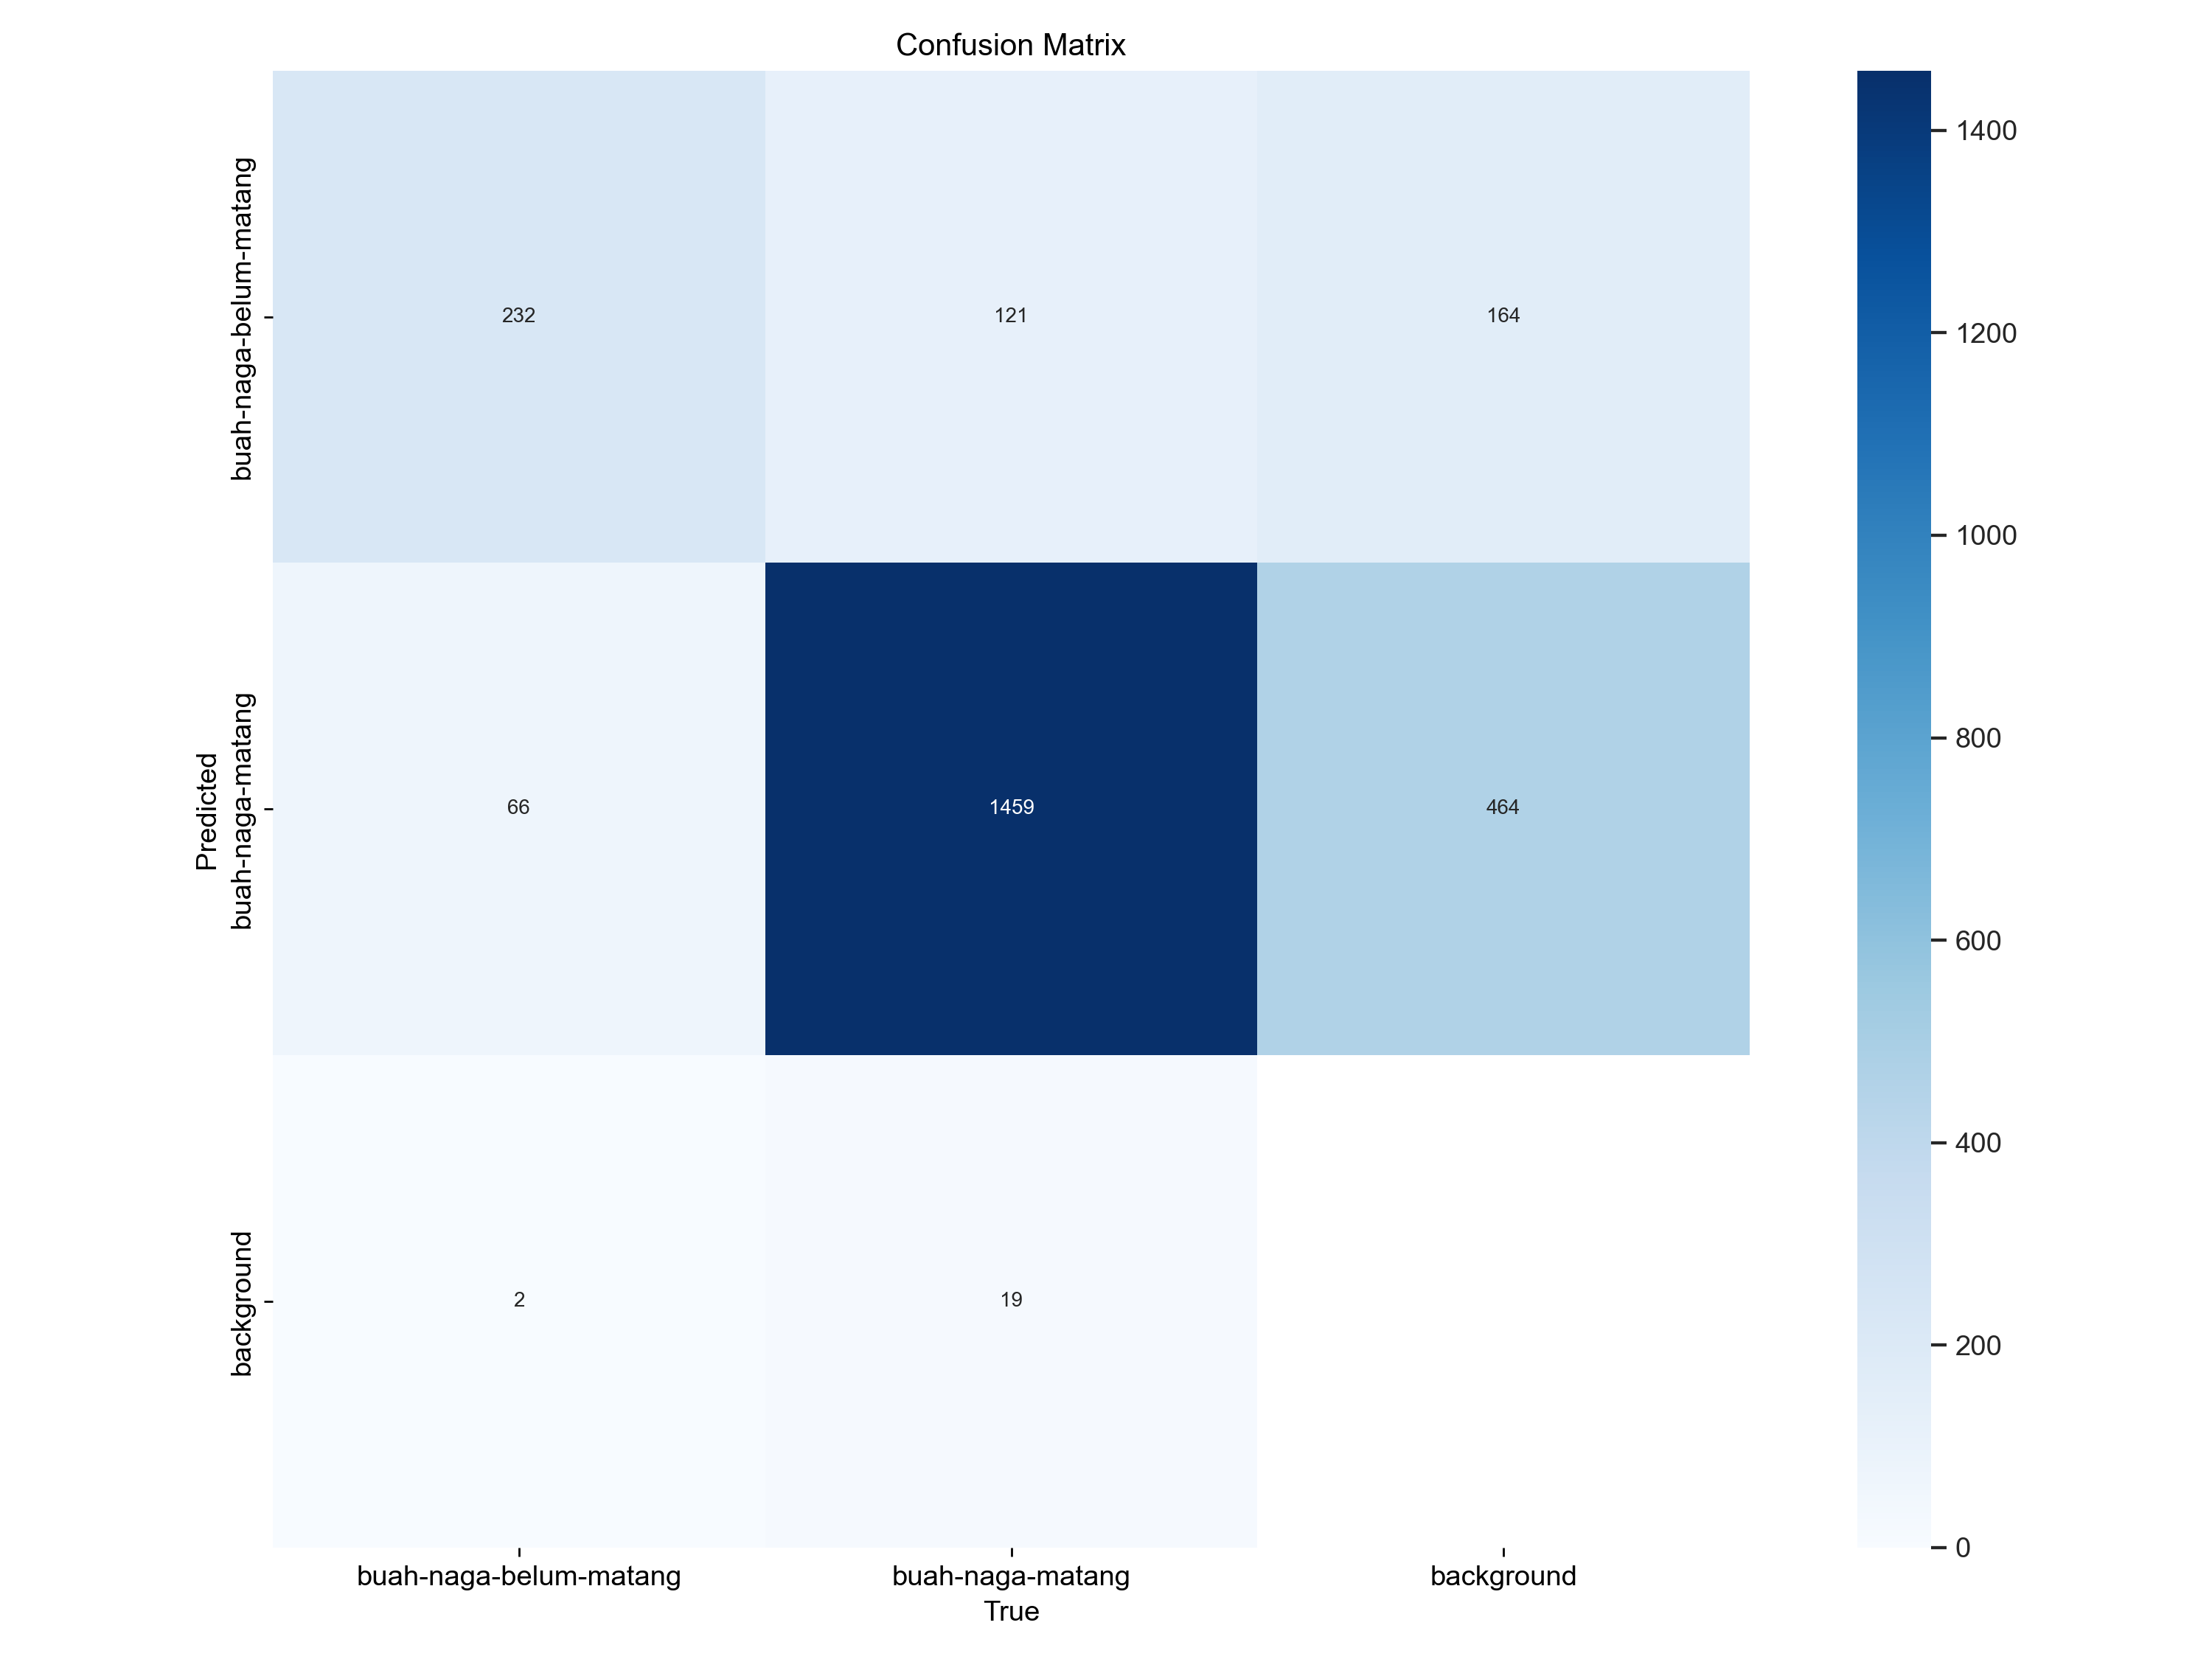

In [7]:
from pathlib import Path
from IPython.display import Image, display

# Cari file confusion matrix-nya di seluruh folder runs
conf_matrix_img = list(Path("runs").rglob("confusion_matrix.png"))

# Tampilkan jika ketemu
if conf_matrix_img:
    display(Image(filename=str(conf_matrix_img[0])))
else:
    print("❌ Confusion matrix image tidak ditemukan.")